# 3) Red de coexpresión génica
Consideramos los datos obtenidos en un estudio de la respuesta transcripcional ante stress de
temperatura sobre una planta (Arabidopsis thaliana). Durante el experimento se sometió a la misma a bajas temperaturas durante dos días, con condiciones de luz controladas.

## a)
Encontramos la matriz de correlación entre los perfiles transcripcionales y estimamos a partir de la misma una matriz de similaridad S tal que

$$S_{ij}=\frac{1+cor(A_{i},A_{j})}{2}$$

In [1]:
import pandas as pd
import numpy as np
Data_genes = pd.read_csv('./data/geneX.csv')
Data_genes = Data_genes.T

headers = Data_genes.iloc[0]
Data_genes  = pd.DataFrame(Data_genes.values[1:], columns=headers)

In [2]:
#Correlación entre columnas de un DataFrame
Data_genes = Data_genes.astype(float)
correlaciones = Data_genes.corr(method='pearson', min_periods=1) 
correlaciones.set_index([correlaciones.iloc[0], correlaciones.columns[0]])
correlaciones

Unnamed: 0,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,...,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01060,1.000000,0.231979,-0.428733,0.916169,0.099693,-0.500882,0.585052,0.751209,-0.757494,-0.165454,...,0.486510,-0.058897,-0.212455,0.088613,0.580779,-0.548548,-0.089202,0.887143,0.587454,0.888658
AT1G01120,0.231979,1.000000,-0.718595,0.449932,0.220159,-0.777605,0.749436,-0.206206,0.018038,0.169543,...,0.884391,0.354795,0.290931,-0.270925,0.556521,-0.568070,0.316805,0.083036,-0.310288,0.394548
AT1G01500,-0.428733,-0.718595,1.000000,-0.465585,-0.083756,0.905592,-0.909657,0.229250,0.423785,0.049670,...,-0.874273,-0.158385,-0.226626,0.630899,-0.863570,0.919465,-0.115490,-0.047366,0.359990,-0.307593
AT1G01520,0.916169,0.449932,-0.465585,1.000000,0.037339,-0.645143,0.648223,0.695317,-0.624236,-0.175154,...,0.625006,-0.055497,-0.272643,0.257792,0.580523,-0.508532,-0.109441,0.852967,0.569699,0.972671
AT1G01580,0.099693,0.220159,-0.083756,0.037339,1.000000,0.029502,-0.016429,-0.001178,0.145582,0.928132,...,0.028625,0.917535,0.838579,-0.172336,-0.102970,-0.281644,0.947694,0.096832,-0.158495,0.041670
AT1G02460,-0.500882,-0.777605,0.905592,-0.645143,0.029502,1.000000,-0.948953,0.085679,0.510217,0.156106,...,-0.926658,-0.082565,-0.064060,0.376472,-0.888307,0.835417,0.004921,-0.180180,0.196827,-0.506397
AT1G02640,0.585052,0.749436,-0.909657,0.648223,-0.016429,-0.948953,1.000000,-0.032494,-0.583743,-0.221371,...,0.908671,0.011012,0.027079,-0.471323,0.952511,-0.871925,-0.043494,0.254589,-0.189900,0.516155
AT1G02820,0.751209,-0.206206,0.229250,0.695317,-0.001178,0.085679,-0.032494,1.000000,-0.406097,-0.162425,...,-0.059676,-0.218336,-0.459527,0.651725,-0.037508,0.099337,-0.218389,0.937843,0.933830,0.783251
AT1G04770,-0.757494,0.018038,0.423785,-0.624236,0.145582,0.510217,-0.583743,-0.406097,1.000000,0.408266,...,-0.362005,0.247881,0.252280,0.202272,-0.747650,0.612590,0.308641,-0.494440,-0.255591,-0.505210


Notamos que la correlacion de un gen consigo mismo es $1$, pero como el objetivo es definir la matriz de similaridad a partir de la correlación y no queremos 'autoloops', entonces definimos como $0$ la similaridad de un gen consigo mismo ($S_{ii}$)

In [3]:
similaridad=(correlaciones+1)/2
np.fill_diagonal(similaridad.values, 0)
similaridad

Unnamed: 0,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,...,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01060,0.000000,0.615990,0.285634,0.958085,0.549846,0.249559,0.792526,0.875604,0.121253,0.417273,...,0.743255,0.470551,0.393773,0.544306,0.790390,0.225726,0.455399,0.943571,0.793727,0.944329
AT1G01120,0.615990,0.000000,0.140702,0.724966,0.610079,0.111197,0.874718,0.396897,0.509019,0.584771,...,0.942196,0.677397,0.645465,0.364538,0.778260,0.215965,0.658403,0.541518,0.344856,0.697274
AT1G01500,0.285634,0.140702,0.000000,0.267208,0.458122,0.952796,0.045172,0.614625,0.711893,0.524835,...,0.062863,0.420807,0.386687,0.815450,0.068215,0.959733,0.442255,0.476317,0.679995,0.346204
AT1G01520,0.958085,0.724966,0.267208,0.000000,0.518669,0.177428,0.824111,0.847658,0.187882,0.412423,...,0.812503,0.472251,0.363678,0.628896,0.790262,0.245734,0.445279,0.926483,0.784850,0.986336
AT1G01580,0.549846,0.610079,0.458122,0.518669,0.000000,0.514751,0.491786,0.499411,0.572791,0.964066,...,0.514312,0.958767,0.919289,0.413832,0.448515,0.359178,0.973847,0.548416,0.420753,0.520835
AT1G02460,0.249559,0.111197,0.952796,0.177428,0.514751,0.000000,0.025524,0.542840,0.755109,0.578053,...,0.036671,0.458718,0.467970,0.688236,0.055847,0.917709,0.502461,0.409910,0.598413,0.246801
AT1G02640,0.792526,0.874718,0.045172,0.824111,0.491786,0.025524,0.000000,0.483753,0.208128,0.389314,...,0.954335,0.505506,0.513540,0.264338,0.976256,0.064038,0.478253,0.627294,0.405050,0.758077
AT1G02820,0.875604,0.396897,0.614625,0.847658,0.499411,0.542840,0.483753,0.000000,0.296952,0.418787,...,0.470162,0.390832,0.270237,0.825862,0.481246,0.549669,0.390805,0.968922,0.966915,0.891625
AT1G04770,0.121253,0.509019,0.711893,0.187882,0.572791,0.755109,0.208128,0.296952,0.000000,0.704133,...,0.318998,0.623941,0.626140,0.601136,0.126175,0.806295,0.654320,0.252780,0.372205,0.247395


Definiendo la similaridad de esta manera logramos que la similaridad tenga un valor entre $0$ y $1$, donde $0$ representa una correlación negativa perfecta, $1/2$ representa cero correlación y $1$ representa correlación positiva perfecta. 

La idea de este análisis sobre los vectores temporales de transcripción de los genes es que si dos genes tienen un perfil de transcripción parecido, entonces probablemente compartan factores de transcripción. Es decir, esta red de similaridad quiere representar que dos genes se encienden en el mismo entorno. 

Otra manera de pensarlo es que en cierta manera representa la probabilidad de que ambas transcripciones sucedan en simultaneo, si la correlación es perfectamente negativa $\left ( cor(A_{i},A_{j})=-1 \right )$, la probabilidad es nula, y si es perfectamente positiva $\left (cor(A_{i},A_{j})=1\right )$ la probabilidad es $1$.


## b)
Construimos la red de coexpresión génica, utilizando como matriz de adyacencia A una versión
binarizada de la matriz S:

$$a_{ij}=\left \{ _{0 \:\text{ si }\:s_{ij} <  0.95}^{1 \:\text{ si }\: s_{ij}\geq 0.95} \right. $$

In [4]:
ady_arrays=np.where(similaridad >=0.95,1,0)
adyacencia=pd.DataFrame(ady_arrays)
adyacencia

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## c)
Calcule la partición en clusters de dicha red mediante los métodos infomap y fastgreedy. Estime la modularidad de ambas particiones. Visualice ambas redes y compare el tipo y granularidad de las particiones obtenidas.


In [137]:
import networkx as nx
import igraph as ig 
import matplotlib.pyplot as plt

Red_genes_nx = nx.from_pandas_adjacency(adyacencia)
Red_genes_igraph = ig.Graph.TupleList(Red_genes_nx.edges(), directed=False)

In [138]:
def convertir_particion_igraph_a_diccionario(Red_igraph,particion_igraph):
    particion_dict = {}
    for cluster in range(len(particion_igraph)):
        for nodo in Red_igraph.vs(particion_igraph[cluster])['name']:
            particion_dict.update({nodo:cluster})
    return particion_dict

import random
def colores_hex(n):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(n)]
    return color

posiciones = nx.spring_layout(Red_genes_nx)

In [139]:
particiones_genes = {}

#particiones con Fast Greedy
dendograma_fast_greedy = Red_genes_igraph.community_fastgreedy(weights=None)
particiones_fast_greedy = dendograma_fast_greedy.as_clustering()
dict_particiones_fast_greedy = convertir_particion_igraph_a_diccionario(Red_genes_igraph,particiones_fast_greedy)
particiones_genes['Fast_greedy'] = dict_particiones_fast_greedy

#particiones con infomap
particiones_infomap = Red_genes_igraph.community_infomap()
dict_particiones_infomap = convertir_particion_igraph_a_diccionario(Red_genes_igraph,particiones_infomap)
particiones_genes['Infomap'] = dict_particiones_infomap

In [140]:
nodos_sin_comunidad = {}

La partición con Fast_greedy tiene 11 comunidades y 29 nodos sin comunidad.
La partición con Infomap tiene 26 comunidades y 29 nodos sin comunidad.
Los nodos sin comunidad corresponden a nodos que no tienen enlaces. Forman comunidad sólo con ellos mismos


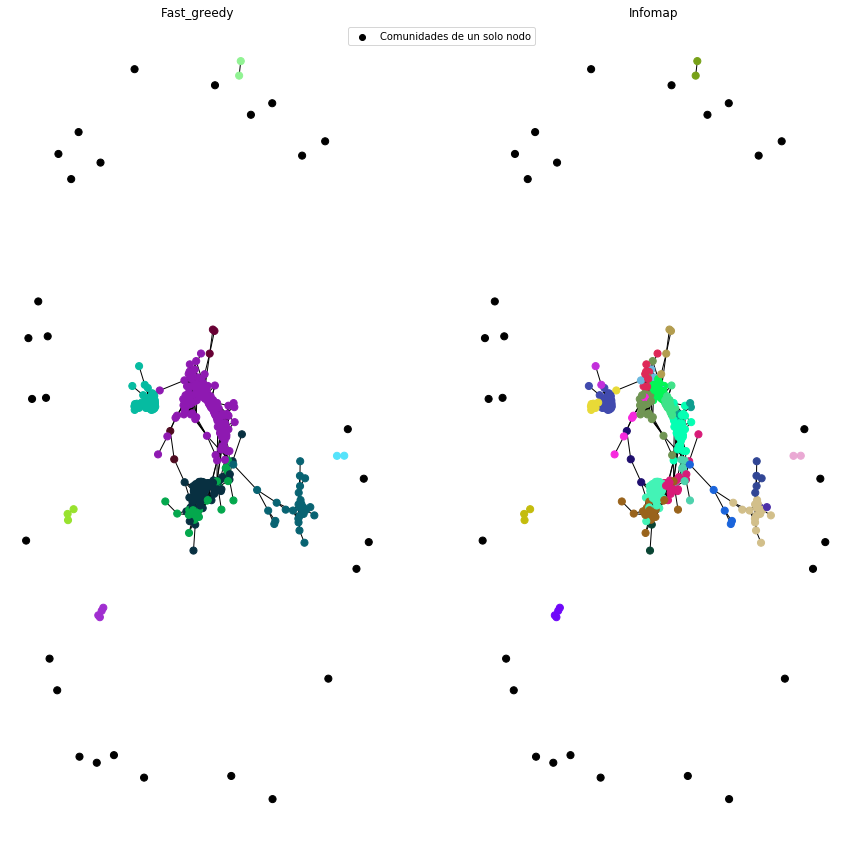

In [156]:
#dendograma_fast_greedy.optimal_count
f, axs = plt.subplots(1, 2, figsize=(15,15))
axs = axs.flatten()
for i,metodo in enumerate(particiones_genes.keys()):
    particion = particiones_genes[metodo]
    colores = colores_hex(max(particion.values())+1) #funcion que devuelve n colores
    nodos_sin_comunidad[metodo] = set(Red_genes_nx.nodes()).difference(set(particion.keys()))
    print(f'La partición con {metodo} tiene {len(colores)} comunidades y {len(nodos_sin_comunidad[metodo])} nodos sin comunidad.') 
    if metodo == 'Infomap':
        print("Los nodos sin comunidad corresponden a nodos que no tienen enlaces. Forman comunidad sólo con ellos mismos")
    
  # le asigno un color a cada nodo
    node_color = []
    for node in Red_genes_nx.nodes():
        if particion.get(node) is not None:
            node_color.append(colores[particion[node]])
        else:
            node_color.append('black')

    nx.draw(Red_genes_nx, node_size= 50, ax = axs[i], node_color=node_color,pos=posiciones )
    axs[i].set_title(metodo)


plt.scatter([],[], c = 'black', label='Comunidades de un solo nodo')
plt.legend(bbox_to_anchor=(0.2, 1))
plt.show()

In [131]:
#Estime la modularidad de ambas particiones. 

Para poder calcular la modularidad, agrego a las particiones a los nodos sin comunidad asignándoles a cada uno su propia comunidad. 

In [129]:
for metodo in particiones_genes:
    cant_comunidades = (max(particiones_genes[metodo].values())+1)
    for i, node in enumerate(nodos_sin_comunidad[metodo]):
        particiones_genes[metodo][node] = cant_comunidades + i

In [135]:
import community

coeficientes_modularidad = {}
for i,metodo in enumerate(particiones_genes):
    particion = particiones_genes[metodo]
    mod = community.modularity(particion,Red_genes_nx)
    coeficientes_modularidad[metodo]= round(mod, 3)
print(coeficientes_modularidad)

{'Fast_greedy': 0.666, 'Infomap': 0.686}
